# 1. Title, Name and References

#### Classification Analysis using feature selection and various classification models to improve accuracy score

#### Introduction
This project objective is to perfom a classification analysis over a sampled dataset from a baking instute in Portugal in order to understand what are the variables that produce the most impact over a client's decision to subscribe to a term deposit offered by the bank, and predict with a good level of accuracy what would be the outcome given a hypothetical scenario. 
The steps used for this analysis were first the implementation of three different feature selection models to identify what features should be used for the analyses, second the execution of a pipeline model containing six classifiers in order to find which would present the best accuracy score. And finaly exercise a out of the original sample prediction example.

#### Team member
1. Ngoc Chau Tran - 300307368
2. Leozítor Floro de Souza - 300334919
3. Carolina Henrique de Melo Louback - 300306289

#### References
- Class notes
- Samuel Otim class notes from CSIS 4260 coursed in fall 2020

# 2. Library import and data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from numpy import mean
from sklearn import metrics
from datetime import datetime as dt
from xgboost import XGBClassifier
from sklearn import datasets, linear_model
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss, classification_report, roc_curve, roc_auc_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

%matplotlib inline

# 3. Data Analysis, Preparation and Wrangling

In [2]:
df2 = pd.read_csv('bank-sampled.csv') # full dataset
df = pd.read_csv('bank-sampled-9K.csv') # 20% dataset

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,blue-collar,married,secondary,no,580,yes,no,unknown,16,may,192,1,-1,0,unknown,no
1,47,services,single,secondary,no,3644,no,no,unknown,9,jun,83,2,-1,0,unknown,no
2,25,student,single,tertiary,no,538,yes,no,cellular,20,apr,226,1,-1,0,unknown,no
3,42,management,married,tertiary,no,1773,no,no,cellular,9,apr,311,1,336,1,failure,no
4,56,management,married,tertiary,no,217,no,yes,cellular,21,jul,121,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9037,26,admin.,single,tertiary,no,689,no,no,cellular,25,mar,78,1,-1,0,unknown,no
9038,47,management,married,tertiary,no,1890,no,no,cellular,8,jul,161,1,-1,0,unknown,no
9039,32,blue-collar,single,secondary,no,217,yes,no,cellular,15,may,692,3,-1,0,unknown,yes
9040,52,admin.,divorced,secondary,no,0,yes,no,unknown,26,may,206,1,-1,0,unknown,no


In [4]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# dropping duration as suggested by the documentation
df.drop('duration', axis=1, inplace=True)

#Convert the two-column time to a column containing the number of days till the last day of campaing
last_date = "18 Nov, 2010" # assume the analysis date was nov 18th 2010.
dt_1 = dt.strptime(last_date, "%d %b, %Y") #change it to datetime

#Convert month first letter to upper case
df['month'] = df['month'].apply(lambda x: x.capitalize())
df['date'] = df['day'].astype(str) + " " + df['month'] + ", 2010"

#Calculate duration between two dates
df['last_contact'] = df['date'].apply(lambda x: (dt_1 - dt.strptime(x, "%d %b, %Y")).days)

#drop unacessary columns
df.drop(columns={'day', 'date', 'month'}, axis=1, inplace=True)

In [6]:
df

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y,last_contact
0,40,blue-collar,married,secondary,no,580,yes,no,unknown,1,-1,0,unknown,no,186
1,47,services,single,secondary,no,3644,no,no,unknown,2,-1,0,unknown,no,162
2,25,student,single,tertiary,no,538,yes,no,cellular,1,-1,0,unknown,no,212
3,42,management,married,tertiary,no,1773,no,no,cellular,1,336,1,failure,no,223
4,56,management,married,tertiary,no,217,no,yes,cellular,2,-1,0,unknown,no,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9037,26,admin.,single,tertiary,no,689,no,no,cellular,1,-1,0,unknown,no,238
9038,47,management,married,tertiary,no,1890,no,no,cellular,1,-1,0,unknown,no,133
9039,32,blue-collar,single,secondary,no,217,yes,no,cellular,3,-1,0,unknown,yes,187
9040,52,admin.,divorced,secondary,no,0,yes,no,unknown,1,-1,0,unknown,no,176


In [7]:
df.shape

(9042, 15)

In [8]:
# Display the summary statistics of the data
df.describe()

,age,balance,campaign,pdays,previous,last_contact
count,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000
mean,40.958195,1367.082061,2.756691,40.273391,0.580624,151.159699
std,10.621398,3130.311959,3.008022,100.223320,2.012452,74.298372
min,18.000000,-2712.000000,1.000000,-1.000000,0.000000,-43.000000
25%,33.000000,79.000000,1.000000,-1.000000,0.000000,105.000000
50%,39.000000,453.500000,2.000000,-1.000000,0.000000,167.000000
75%,48.000000,1414.750000,3.000000,-1.000000,0.000000,193.000000
max,93.000000,98417.000000,55.000000,842.000000,58.000000,315.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9042 entries, 0 to 9041
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           9042 non-null   int64 
 1   job           9042 non-null   object
 2   marital       9042 non-null   object
 3   education     9042 non-null   object
 4   default       9042 non-null   object
 5   balance       9042 non-null   int64 
 6   housing       9042 non-null   object
 7   loan          9042 non-null   object
 8   contact       9042 non-null   object
 9   campaign      9042 non-null   int64 
 10  pdays         9042 non-null   int64 
 11  previous      9042 non-null   int64 
 12  poutcome      9042 non-null   object
 13  y             9042 non-null   object
 14  last_contact  9042 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 1.0+ MB


In [10]:
df[['job', 'marital', 'education', 'contact', 'poutcome']]

,job,marital,education,contact,poutcome
0,blue-collar,married,secondary,unknown,unknown
1,services,single,secondary,unknown,unknown
2,student,single,tertiary,cellular,unknown
3,management,married,tertiary,cellular,failure
4,management,married,tertiary,cellular,unknown
...,...,...,...,...,...
9037,admin.,single,tertiary,cellular,unknown
9038,management,married,tertiary,cellular,unknown
9039,blue-collar,single,secondary,cellular,unknown
9040,admin.,divorced,secondary,unknown,unknown


In [11]:
# Number of unique values in each column
df.nunique()

age               71
job               12
marital            3
education          4
default            2
balance         3474
housing            2
loan               2
contact            3
campaign          36
pdays            373
previous          32
poutcome           4
y                  2
last_contact     284
dtype: int64

In [12]:
# Verifying if Null values exist
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
campaign        0
pdays           0
previous        0
poutcome        0
y               0
last_contact    0
dtype: int64

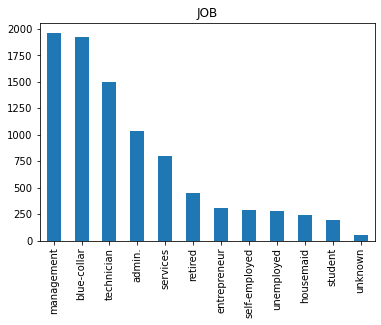

In [13]:
#Job
df['job'].value_counts().plot(kind='bar', title='JOB')

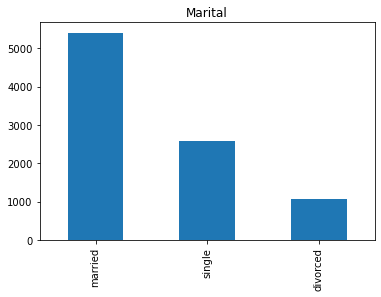

In [14]:
#Marital
df['marital'].value_counts().plot(kind='bar', title='Marital')

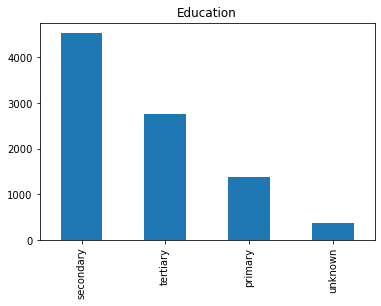

In [15]:
#education
df['education'].value_counts().plot(kind='bar', title='Education')

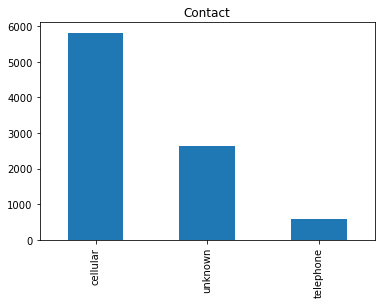

In [16]:
#contact
df['contact'].value_counts().plot(kind='bar', title='Contact')

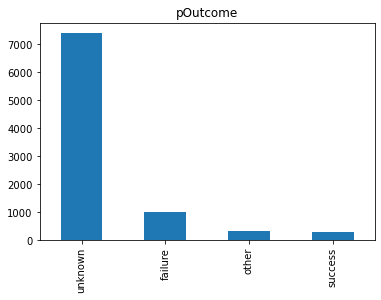

In [17]:
#poutcome
df['poutcome'].value_counts().plot(kind='bar', title='pOutcome')

In [18]:
#Get dummy variables from catgeorical variables
job = pd.get_dummies(df['job'],prefix='job',drop_first=True)
marital = pd.get_dummies(df['marital'],prefix='marital',drop_first=True)
education = pd.get_dummies(df['education'],prefix='education',drop_first=True)
default = pd.get_dummies(df['default'],prefix='default',drop_first=True)
housing = pd.get_dummies(df['housing'],prefix='housing',drop_first=True)
loan = pd.get_dummies(df['loan'],prefix='loan',drop_first=True)
contact = pd.get_dummies(df['contact'],prefix='contact',drop_first=True)
poutcome = pd.get_dummies(df['poutcome'],prefix='poutcome',drop_first=True)
y = pd.get_dummies(df['y'],prefix='y',drop_first=True)

In [19]:
#Add job dummies to dataframe and drop original job column
df = df.join(job)
df.drop('job', axis=1, inplace=True)
df.head()

,age,marital,education,default,balance,housing,loan,contact,campaign,pdays,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,40,married,secondary,no,580,yes,no,unknown,1,-1,...,0,0,0,0,0,0,0,0,0,0
1,47,single,secondary,no,3644,no,no,unknown,2,-1,...,0,0,0,0,0,1,0,0,0,0
2,25,single,tertiary,no,538,yes,no,cellular,1,-1,...,0,0,0,0,0,0,1,0,0,0
3,42,married,tertiary,no,1773,no,no,cellular,1,336,...,0,0,1,0,0,0,0,0,0,0
4,56,married,tertiary,no,217,no,yes,cellular,2,-1,...,0,0,1,0,0,0,0,0,0,0


In [20]:
#Add marital dummies to dataframe and drop original column
df = df.join(marital)
df.drop('marital', axis=1, inplace=True)
df.head()

,age,education,default,balance,housing,loan,contact,campaign,pdays,previous,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single
0,40,secondary,no,580,yes,no,unknown,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
1,47,secondary,no,3644,no,no,unknown,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,25,tertiary,no,538,yes,no,cellular,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
3,42,tertiary,no,1773,no,no,cellular,1,336,1,...,1,0,0,0,0,0,0,0,1,0
4,56,tertiary,no,217,no,yes,cellular,2,-1,0,...,1,0,0,0,0,0,0,0,1,0


In [21]:
#Add education dummies to dataframe and drop original column
df = df.join(education)
df.drop('education', axis=1, inplace=True)
df.head()

,age,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,...,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,40,no,580,yes,no,unknown,1,-1,0,unknown,...,0,0,0,0,0,1,0,1,0,0
1,47,no,3644,no,no,unknown,2,-1,0,unknown,...,1,0,0,0,0,0,1,1,0,0
2,25,no,538,yes,no,cellular,1,-1,0,unknown,...,0,1,0,0,0,0,1,0,1,0
3,42,no,1773,no,no,cellular,1,336,1,failure,...,0,0,0,0,0,1,0,0,1,0
4,56,no,217,no,yes,cellular,2,-1,0,unknown,...,0,0,0,0,0,1,0,0,1,0


In [22]:
#Add default dummies to dataframe and drop original column
df = df.join(default)
df.drop('default', axis=1, inplace=True)
df.head()

,age,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y,...,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes
0,40,580,yes,no,unknown,1,-1,0,unknown,no,...,0,0,0,0,1,0,1,0,0,0
1,47,3644,no,no,unknown,2,-1,0,unknown,no,...,0,0,0,0,0,1,1,0,0,0
2,25,538,yes,no,cellular,1,-1,0,unknown,no,...,1,0,0,0,0,1,0,1,0,0
3,42,1773,no,no,cellular,1,336,1,failure,no,...,0,0,0,0,1,0,0,1,0,0
4,56,217,no,yes,cellular,2,-1,0,unknown,no,...,0,0,0,0,1,0,0,1,0,0


In [23]:
#Add housing dummies to dataframe and drop original column
df = df.join(housing)
df.drop('housing', axis=1, inplace=True)
df.head()

,age,balance,loan,contact,campaign,pdays,previous,poutcome,y,last_contact,...,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes
0,40,580,no,unknown,1,-1,0,unknown,no,186,...,0,0,0,1,0,1,0,0,0,1
1,47,3644,no,unknown,2,-1,0,unknown,no,162,...,0,0,0,0,1,1,0,0,0,0
2,25,538,no,cellular,1,-1,0,unknown,no,212,...,0,0,0,0,1,0,1,0,0,1
3,42,1773,no,cellular,1,336,1,failure,no,223,...,0,0,0,1,0,0,1,0,0,0
4,56,217,yes,cellular,2,-1,0,unknown,no,120,...,0,0,0,1,0,0,1,0,0,0


In [24]:
#Add loan dummies to dataframe and drop original column
df = df.join(loan)
df.drop('loan', axis=1, inplace=True)
df.head()

,age,balance,contact,campaign,pdays,previous,poutcome,y,last_contact,job_blue-collar,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes
0,40,580,unknown,1,-1,0,unknown,no,186,1,...,0,0,1,0,1,0,0,0,1,0
1,47,3644,unknown,2,-1,0,unknown,no,162,0,...,0,0,0,1,1,0,0,0,0,0
2,25,538,cellular,1,-1,0,unknown,no,212,0,...,0,0,0,1,0,1,0,0,1,0
3,42,1773,cellular,1,336,1,failure,no,223,0,...,0,0,1,0,0,1,0,0,0,0
4,56,217,cellular,2,-1,0,unknown,no,120,0,...,0,0,1,0,0,1,0,0,0,1


In [25]:
#Add contact dummies to dataframe and drop original column
df = df.join(contact)
df.drop('contact', axis=1, inplace=True)
df.head()

,age,balance,campaign,pdays,previous,poutcome,y,last_contact,job_blue-collar,job_entrepreneur,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,40,580,1,-1,0,unknown,no,186,1,0,...,1,0,1,0,0,0,1,0,0,1
1,47,3644,2,-1,0,unknown,no,162,0,0,...,0,1,1,0,0,0,0,0,0,1
2,25,538,1,-1,0,unknown,no,212,0,0,...,0,1,0,1,0,0,1,0,0,0
3,42,1773,1,336,1,failure,no,223,0,0,...,1,0,0,1,0,0,0,0,0,0
4,56,217,2,-1,0,unknown,no,120,0,0,...,1,0,0,1,0,0,0,1,0,0


In [26]:
#Add poutcome dummies to dataframe and drop original column
df = df.join(poutcome)
df.drop('poutcome', axis=1, inplace=True)
df.head()

,age,balance,campaign,pdays,previous,y,last_contact,job_blue-collar,job_entrepreneur,job_housemaid,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,40,580,1,-1,0,no,186,1,0,0,...,0,0,0,1,0,0,1,0,0,1
1,47,3644,2,-1,0,no,162,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,25,538,1,-1,0,no,212,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,42,1773,1,336,1,no,223,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,56,217,2,-1,0,no,120,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [27]:
#Add y dummies to dataframe and drop original column
df = df.join(y)
df.drop('y', axis=1, inplace=True)
df.head()

,age,balance,campaign,pdays,previous,last_contact,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,40,580,1,-1,0,186,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,47,3644,2,-1,0,162,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,25,538,1,-1,0,212,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,42,1773,1,336,1,223,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,56,217,2,-1,0,120,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [28]:
#replacing any appearance of hypen ‘-‘
df=df.rename(columns=lambda x:x.replace('-','_'))

In [29]:
df.columns

Index(['age', 'balance', 'campaign', 'pdays', 'previous', 'last_contact',
       'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')

# 4 Feature Selection and Scaling

Perform feature selection from the dataset. Use the following feature selection methods and choose
the feature selection method that has the lowest number of features. If there is a tie, you should select
the first method that has the lowest number of features.

In [30]:
#Define the X (features) and Y (outcome variable)
X = df.drop(['y_yes'], axis=1)
y = df['y_yes']
X.shape

(9042, 30)

There are currently 30 features and we need to find out how many of those are statistically significant to keep for our analysis.

### 4.1 Logistic Regression

In [31]:
#obtain the variables with higher coefficients
logisticRegression_method = SelectFromModel(estimator=LogisticRegression(max_iter=5000)).fit(X,y)
logisticRegression_method.estimator_.coef_

array([[-4.09725848e-03,  2.29563327e-05, -1.13036286e-01,
        -2.11371498e-03,  1.87884823e-03,  1.29278278e-03,
        -2.82611761e-01, -2.85865746e-01, -3.00464498e-01,
        -1.51683648e-02,  6.01251661e-01, -1.89131629e-01,
        -2.75671492e-01,  3.45920843e-01, -6.85613432e-02,
        -6.82407091e-02,  6.34124478e-03, -3.12515762e-01,
         5.89758023e-02, -4.94652572e-02,  9.79179300e-02,
         1.31711585e-01, -1.78958085e-02, -4.57788108e-01,
        -6.58942307e-01, -2.54912609e-01, -9.20943094e-01,
        -1.88466537e-01,  1.86750430e+00, -8.14859721e-01]])

In [32]:
#Obtain threshold value as the parameter to know which features should be removed
#according to this method
logisticRegression_method.threshold_

0.2797856652140363

In [33]:
#Run get_support() to see which are TRUE for significant features
logisticRegression_method.get_support(indices=True)

array([ 6,  7,  8, 10, 13, 17, 23, 24, 26, 28, 29], dtype=int64)

In [34]:
#Apply transform() to get the subset of features to be used
X_logisticR = logisticRegression_method.transform(X)
X_logisticR.shape

(9042, 11)

Out of 30 features, the logistic regression features selecting method finds 11 features to be statistically significant for the analysis.

In [35]:
#create a dataframe to save selected features by this method
X_logisticR_df = X.iloc[:,[6, 7, 8, 10, 13, 17, 23, 24, 26, 28, 29]].copy()
X_logisticR_df.head()

,job_blue_collar,job_entrepreneur,job_housemaid,job_retired,job_student,marital_married,housing_yes,loan_yes,contact_unknown,poutcome_success,poutcome_unknown
0,1,0,0,0,0,1,1,0,1,0,1
1,0,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,1,0,1,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,1


### 4.2 Linear SVM

In [36]:
lsvc = LinearSVC(C=0.001,dual=False).fit(X, y)
svm_method = SelectFromModel(lsvc, prefit=True)
svm_method.get_support(indices=True)

array([ 6, 10, 17, 23, 24, 26, 28, 29], dtype=int64)

In [37]:
X_svm = svm_method.transform(X)
X_svm.shape

(9042, 8)

In [38]:
#create a dataframe to save selected features by this method
X_svm_df = X.iloc[:,svm_method.get_support(indices=True)].copy()
X_svm_df.head()

,job_blue_collar,job_retired,marital_married,housing_yes,loan_yes,contact_unknown,poutcome_success,poutcome_unknown
0,1,0,1,1,0,1,0,1
1,0,0,0,0,0,1,0,1
2,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,1


Out of 30 features, the SVM features selecting method finds 8 features to be statistically significant for the analysis.

### 4.3 SelectKBest 

In [39]:
KBest_method = SelectKBest(mutual_info_classif, k=10).fit(X, y)

In [40]:
KBest_method.get_support(indices=True)

array([ 0,  1,  3,  4,  5, 10, 26, 27, 28, 29], dtype=int64)

In [41]:
#Apply transform() to get the subset of features to be used
X_KBest = KBest_method.transform(X)
X_KBest.shape

(9042, 10)

In [42]:
#create a dataframe to save selected features by this method
X_KBest_df = X.iloc[:,KBest_method.get_support(indices=True)].copy()
X_KBest_df.head()

,age,balance,pdays,previous,last_contact,job_retired,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,40,580,-1,0,186,0,1,0,0,1
1,47,3644,-1,0,162,0,1,0,0,1
2,25,538,-1,0,212,0,0,0,0,1
3,42,1773,336,1,223,0,0,0,0,0
4,56,217,-1,0,120,0,0,0,0,1


#### Test the performance of each feature selection method

In [43]:
#Method 1 - Logistic Regression
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_logisticR, y, test_size=0.25, random_state=0)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train1, y_train1)
y_pred_1 = logreg.predict(X_test1)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test1, y_test1)))

Accuracy of logistic regression classifier on test set: 0.88633


In [44]:
#Method 2 - SVM 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_svm, y, test_size=0.25, random_state=0)
logreg2 = LogisticRegression(max_iter=5000)
logreg2.fit(X_train2, y_train2)
y_pred_2 = logreg2.predict(X_test2)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg2.score(X_test2, y_test2)))

Accuracy of logistic regression classifier on test set: 0.88633


In [45]:
#Method 3 - KBEST 
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_KBest, y, test_size=0.25, random_state=0)
logreg3 = LogisticRegression(max_iter=5000)
logreg3.fit(X_train3, y_train3)
y_pred_3 = logreg3.predict(X_test3)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg3.score(X_test3, y_test3)))

Accuracy of logistic regression classifier on test set: 0.88058


### 4.4 The best classifier model and features selected

Based on the features selection method performed, even though the first two methods result in a tie for the accuracy score using the Logistic Regression Classifier, with 0.88633 accuracy, the SVM model is the one chosen for the proceeding with in the exercise because it selected the least number of features.

After performing feature selection with 8 features selected, we use the function to get the columns selected and save it to another dataset name” feature1.csv”. Then, we do robust scaler for feature scaling to normalize range of variable.

In [46]:
#Save the feature dataframe into a csv file with the following naming convention:feature1.csv
X_svm_df.to_csv('feature1.csv', index=False)

In [47]:
#Use robust scaller to scale the feature selected
robust = RobustScaler().fit_transform(X_svm_df) 

# create the dataframe again
X_rb = pd.DataFrame(robust, index=X_svm_df.index, columns=X_svm_df.columns)
X_rb = X_rb.reset_index(drop=True)
X_rb.head()

,job_blue_collar,job_retired,marital_married,housing_yes,loan_yes,contact_unknown,poutcome_success,poutcome_unknown
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,-1.0,-1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0
4,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0


# 5 Classifier Modelling

The next step we train the new dataset with various classification models and select the best model. First of all we divided it into training and test data set with the ratio 75:25. Second, we use standard K-folds for cross validation, after that we use other machine learning pipeline to implement those classifier models below:
- Naïve Bayes classifier 
- KNN 
- Decision tree classifier 
- Random forest classifier 
- Ada BOOST classifier 
- XGBOOST classifier 

In [48]:
# const Vars
K_FOLDS = 3 # number of k folds
R_SEED = 42 # Random seed

verifying the balance of indep var

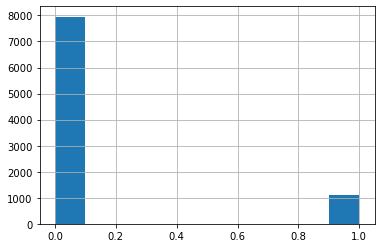

In [49]:
df['y_yes'].hist()

As it is not correctly balanced, let's splitt in a stratified way to be sure the same percentage of **no** and **yes** samples will be splitted to train and test

#### Splitting dataset into 75% train and 25% test

For use of the Pipeline to make sense, we will read the features again intead of using the scaled one from last step.

In [50]:
X_svm_df = pd.read_csv('feature1.csv')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_svm_df, y, test_size=0.25, random_state=R_SEED, stratify=y)

#check data
X_train

,job_blue_collar,job_retired,marital_married,housing_yes,loan_yes,contact_unknown,poutcome_success,poutcome_unknown
9028,0,0,1,1,0,0,0,1
1694,0,0,1,1,0,1,0,1
5535,0,0,0,0,0,0,0,1
3549,0,0,1,0,0,0,0,1
1367,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
5605,0,0,1,0,0,0,0,1
2445,0,0,0,1,0,1,0,1
8722,0,0,0,1,0,0,0,1
2625,0,0,0,1,0,0,1,0


In [52]:
best_models = [] # list to hold the best classifier

In [53]:
# Names of the various classification approaches for easy presentation of the results
names = ["Nearest Neighbors", "Decision Tree", "Naive Bayes", "Random Forest", "Ada BOOST", "XGBOOST"]

scores_1_try = [] #list variable to hold classification accuracy scores

current_best = { "classifier": None, "score": 0 } # hold the current step's best classifier

classifiers_1_try = [
    KNeighborsClassifier(3),  
    DecisionTreeClassifier(max_depth=5),    
    GaussianNB(),
    RandomForestClassifier(max_depth=5, max_features=1, n_estimators=1000),
    AdaBoostClassifier(learning_rate=0.1),
    XGBClassifier()]

for classifier in classifiers_1_try:
    pipeline = Pipeline(steps=[('scaler', RobustScaler()),('classifier', classifier)])
    cv = KFold(n_splits=3)
    pipeline.fit(X_train, y_train)
    n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv) 
    print(classifier)
    scores_1_try.append(mean(n_scores))
    if current_best["score"] < mean(n_scores):
        current_best = {"classifier": classifier, "score": mean(n_scores)}
    print('Model mean accuracy score: %.6f ' % mean(n_scores))
    print("\n -----------------------------------------------------------------------------------")

best_models.append(current_best) # add the current step best classifier to this list
#end of pipeline

KNeighborsClassifier(n_neighbors=3)
Model mean accuracy score: 0.878631 

 -----------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=5)
Model mean accuracy score: 0.891314 

 -----------------------------------------------------------------------------------
GaussianNB()
Model mean accuracy score: 0.867129 

 -----------------------------------------------------------------------------------
RandomForestClassifier(max_depth=5, max_features=1, n_estimators=1000)
Model mean accuracy score: 0.890577 

 -----------------------------------------------------------------------------------
AdaBoostClassifier(learning_rate=0.1)
Model mean accuracy score: 0.891904 

 -----------------------------------------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interactio

In [54]:
#Print data frame of prediction scores
scores_1_try_df = pd.DataFrame(zip(names,scores_1_try), columns=['Classifier', 'Accuracy Score'])

print(scores_1_try_df)

          Classifier  Accuracy Score
0  Nearest Neighbors        0.878631
1      Decision Tree        0.891314
2        Naive Bayes        0.867129
3      Random Forest        0.890577
4          Ada BOOST        0.891904
5            XGBOOST        0.891314


# 6 Classifier Model - The Second Try

For the question 6, we do the same steps as the previous 5 one, and implement new feature selection with random forest which resulted the accuracy score of 0.88899. Then we used Robust Scaler to scale the independent variable selected above and save into “feature2.csv” file.

In [55]:
# feature selection method with random forest as the estimator.
sel = SelectFromModel(RandomForestClassifier(n_estimators = 1000)).fit(X, y)
X_selected = sel.transform(X)
sel.get_support(indices=True)

array([ 0,  1,  2,  3,  5, 28], dtype=int64)

In [56]:
# check the accuracy score
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=R_SEED)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [57]:
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88899


In [58]:
# get the columns selected information
sel.get_support(indices=True)

array([ 0,  1,  2,  3,  5, 28], dtype=int64)

In [59]:
X_selected=X.iloc[:,sel.get_support(indices=True)]

X_selected.to_csv('feature2.csv', index=False)
X_selected.head()

,age,balance,campaign,pdays,last_contact,poutcome_success
0,40,580,1,-1,186,0
1,47,3644,2,-1,162,0
2,25,538,1,-1,212,0
3,42,1773,1,336,223,0
4,56,217,2,-1,120,0


#### There are 6 feature using random forest as an estimator

In [60]:
#Names of the various classification approaches for easy presentation of the results
names = ["Nearest Neighbors", "Decision Tree", "Naive Bayes", "Random Forest", "Ada BOOST", "XGBOOST"]

scores_2_try = [] #list variable to hold classification accuracy scores

current_best = { "classifier": None, "score": 0 } # hold the current step's best classifier
        
classifiers_2_try =  [
    KNeighborsClassifier(3),  
    DecisionTreeClassifier(max_depth=5),    
    GaussianNB(),
    RandomForestClassifier(max_depth=5, max_features=1, n_estimators=1000),
    AdaBoostClassifier(learning_rate=0.1),
    XGBClassifier()]

for classifier in classifiers_2_try:
    pipeline = Pipeline(steps=[('scaler', RobustScaler()),('classifier', classifier)])
    cv = KFold(n_splits=5)
    pipeline.fit(X_train, y_train)
    n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv)
    print(classifier)
    scores_2_try.append(mean(n_scores))
    if current_best["score"] < mean(n_scores):
        current_best = {"pipeline": pipeline, "score": mean(n_scores)}
    print('Model mean accuracy score: %.6f ' % mean(n_scores))
    #print(f1_score(pipeline.predict(X_train), y_train, average= None))# TODO: Debbug
    #print(classification_report(pipeline.predict(X_train), y_train)) #TODO: Debbug
    print("\n -----------------------------------------------------------------------------------")

best_models.append(current_best) # add the current step best classifier to this list
#end of pipeline

KNeighborsClassifier(n_neighbors=3)
Model mean accuracy score: 0.870522 

 -----------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=5)
Model mean accuracy score: 0.886744 

 -----------------------------------------------------------------------------------
GaussianNB()
Model mean accuracy score: 0.886890 

 -----------------------------------------------------------------------------------
RandomForestClassifier(max_depth=5, max_features=1, n_estimators=1000)
Model mean accuracy score: 0.886742 

 -----------------------------------------------------------------------------------
AdaBoostClassifier(learning_rate=0.1)
Model mean accuracy score: 0.887774 

 -----------------------------------------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interactio

In [61]:
#Print data frame of prediction scores
scores_2_try_df = pd.DataFrame(zip(names,scores_2_try), columns=['Classifier', 'Accuracy Score'])

print(scores_2_try_df)

          Classifier  Accuracy Score
0  Nearest Neighbors        0.870522
1      Decision Tree        0.886744
2        Naive Bayes        0.886890
3      Random Forest        0.886742
4          Ada BOOST        0.887774
5            XGBOOST        0.884974


# 7 Model Evaluation

## 7.1 Summing Up the scores of all models in each step. 

### Step 5 Classifiers

In [62]:
scores_1_try_df

,Classifier,Accuracy Score
0,Nearest Neighbors,0.878631
1,Decision Tree,0.891314
2,Naive Bayes,0.867129
3,Random Forest,0.890577
4,Ada BOOST,0.891904
5,XGBOOST,0.891314


### Step 6 Classifiers

In [63]:
scores_2_try_df

,Classifier,Accuracy Score
0,Nearest Neighbors,0.870522
1,Decision Tree,0.886744
2,Naive Bayes,0.886890
3,Random Forest,0.886742
4,Ada BOOST,0.887774
5,XGBOOST,0.884974


### Comparing Step 5 and 6 classifiers

In [64]:
print("The best Classifier in Step 5 is :")
scores_1_try_df.iloc[scores_1_try_df['Accuracy Score'].idxmax()]

The best Classifier in Step 5 is :


Classifier        Ada BOOST
Accuracy Score     0.891904
Name: 4, dtype: object

In [65]:
print("The best Classifier in Step 6 is")
scores_2_try_df.iloc[scores_2_try_df['Accuracy Score'].idxmax()]

The best Classifier in Step 6 is


Classifier        Ada BOOST
Accuracy Score     0.887774
Name: 4, dtype: object

Ada Boost was the Best model in Step 5 with accuracy of 0.891904 and Ada Boost was also the best model in step 6
0.887774 of accuracy

In step 5 8 features were selected
In step 6 only 6 features were selected

You can see that the accuracy result of Ada Boost in step 6 was slightly less than in step 5 even with a smaller number of features.


## 7.2 Confusion Matrix

In [66]:
model_step_6 = best_models[1]['pipeline'] # selecting the second that is the classifier of step 6

In [67]:
# Defining Confusion Matrix for further use
def confusion_mat(model, X, y, threshold=0.5):
    pred = np.where(model.predict_proba(X)[:,1] > threshold, 1, 0)
    conf_matrix = confusion_matrix(y, pred)
    #Generate seaborn heatmap for the confusion matrix
    df_cm = pd.DataFrame(conf_matrix, columns=np.unique(y), index = np.unique(y))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (4,4))
    sns.set(font_scale=1.2)#for label size
    print(sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cbar=False, vmax=conf_matrix.max(), square=True, fmt="d", cmap="Reds"))

Plotting confusion matrix

AxesSubplot(0.135,0.125;0.755x0.755)


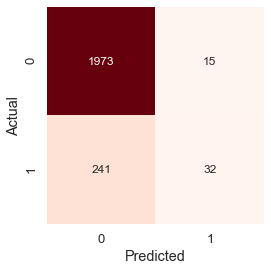

In [68]:
confusion_mat(model=model_step_6, X=X_test, y=y_test)

Those figures means actual number of clients reject new term deposit after being called by the bank (label=0) is 1988 people (1973+15) and decision tree classifier predict 1973 clients do not agree to join.

The actual number of clients who agree to join new term deposit (label=1) is 273(241+32) and decision tree classifier predict 32 clients agree to join.


The result indicates that we have 1973 + 32 correct predictions and 15 + 241 incorrect predictions.

## 7.3 Classification Report

To Understand better a binary classification models other then accuracy, is interesting to rely on  metrics like:

* **Recall Score**: The ratio of positives labeled by the model to all positives, TP / (TP + FN)
* **Precision Score**: The ratio of correctly labeled positives by the model to all positives, TP / (TP + FP)
* **F1 Score**: Harmonic mean o both  Recall and precision, 2 * (Recall * Precision)/ (Recall + Precision)
* **Support**: The number of occurrences of each class in y_test

This way let's plot the Classification report that tells us all of this metrics

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1988
           1       0.65      0.17      0.27       273

    accuracy                           0.89      2261
   macro avg       0.77      0.58      0.61      2261
weighted avg       0.87      0.89      0.86      2261



## 7.4 ROC Curve

In [70]:
str(model_step_6['classifier'])[:22]

'AdaBoostClassifier(lea'

In [71]:
# creating function for plotting roc auc for further use
def plot_roc(model, X, y):
    roc_auc = roc_auc_score(y, model.predict(X))
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])

    plt.figure()
    plt.plot(fpr, tpr, label=f'{str(model["classifier"])[:22]} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()

Plotting the ROC Graph

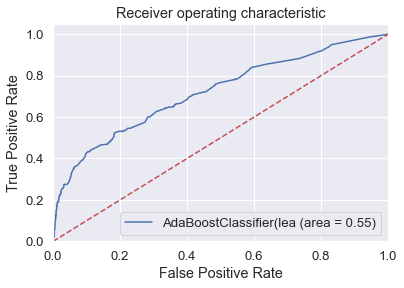

In [72]:
plot_roc(model_step_6, X_test, y_test)

As you can see the model is better to predict class 0 than class 1, in this problem of binary classification, is more likely that most people will reject than sign into the new banking product and consequently the dataset samples imbalaced related to dependent variable, you can see at the chart below the proportion of each class

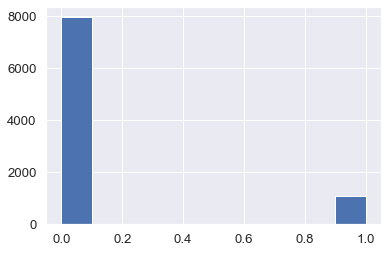

In [73]:
y.hist()

that's why, even the model has high accuracy, predicting class 0 very accurately, is not so good predicting class 1, that for the bank is more important for the business to predict the class 1 than 0. Some techniques can help solve this problem, like oversampling and undersampling, and will be discussed in Step 9 (Additional Step)

# 8 Prediction


Creating new data dataframe as the Guidelines Suggest

In [74]:
new_data_df = pd.DataFrame({"age": [45, 65, 80,21], "balance": [8000, 700, 100, 300],"job":["blue-collar", "retired", "unknown", "students"], "marital": ["married", "divorced", "unknown", "single"], "housing": ["yes", "yes", "no", "no"], "contact": ["cellular", "telephone", "telephone", "cellular"], "campaign": [12, 2, 1 ,3], "pdays":[300, 1, 1, 90], "last_contact": [45, 1, 200, 180], "poutcome": ["success", "success", "unknown", "success"]})
new_data_df

,age,balance,job,marital,housing,contact,campaign,pdays,last_contact,poutcome
0,45,8000,blue-collar,married,yes,cellular,12,300,45,success
1,65,700,retired,divorced,yes,telephone,2,1,1,success
2,80,100,unknown,unknown,no,telephone,1,1,200,unknown
3,21,300,students,single,no,cellular,3,90,180,success


From this new data let's select the same columns we used in our step 6 feature selection that is stored in  feature2.csv

In [75]:
pd.read_csv('feature2.csv')

,age,balance,campaign,pdays,last_contact,poutcome_success
0,40,580,1,-1,186,0
1,47,3644,2,-1,162,0
2,25,538,1,-1,212,0
3,42,1773,1,336,223,0
4,56,217,2,-1,120,0
...,...,...,...,...,...,...
9037,26,689,1,-1,238,0
9038,47,1890,1,-1,133,0
9039,32,217,3,-1,187,0
9040,52,0,1,-1,176,0


Columns as used in step 6

In [76]:
columns = pd.read_csv('feature2.csv').columns # getting only columns of feature2.csv used in step 6

Transforming the only categorical remained in step 6 that is the poutcome

In [77]:
#Get dummy variables from catgeorical variables
poutcome = pd.get_dummies(new_data_df['poutcome'],prefix='poutcome')
new_data_df = new_data_df.join(poutcome)
new_data_df.drop('poutcome', axis=1, inplace=True)

#replacing any appearance of hypen ‘-‘
new_data_df = new_data_df.rename(columns=lambda x:x.replace('-','_'))

# filtering only the same columns as step 6
unseen_data = new_data_df[columns]

To Scale properly the unseed data we need to use the same scaler fit in train data of step 6
So we need to retrive the scaler from step 6 that was saved in best_model_step_6

In [78]:
#Use robust scaller to scale the feature selected
y_pred = np.where(model_step_6.predict_proba(unseen_data)[:,1] > 0.5, 'yes', 'no')#unseen_data_scaled

so The predictions are:

In [79]:
y_pred 

array(['no', 'yes', 'no', 'no'], dtype='<U3')

Concatenating the dataframe with the predictions we have:

In [80]:
new_data_df['y'] = y_pred
new_data_df

,age,balance,job,marital,housing,contact,campaign,pdays,last_contact,poutcome_success,poutcome_unknown,y
0,45,8000,blue-collar,married,yes,cellular,12,300,45,1,0,no
1,65,700,retired,divorced,yes,telephone,2,1,1,1,0,yes
2,80,100,unknown,unknown,no,telephone,1,1,200,0,1,no
3,21,300,students,single,no,cellular,3,90,180,1,0,no


#### Conclusions and Managerials Implications

From the 10 features of the new dataframe sample, 6 were found to be most relevant in order to predict if a new client would be willing to subscribe to a term deposit offered by the bank.
After the prediciton exercise we found that only 1 out of the 4 clients of the new sample would be inclined to become a subscriber. We used this client as a reference for the ideal target audience the bank should aim for when advertising this service.

Bellow we outlined some of the managerial implications each feature could have for the bank future decisions:

#### Age & Balance:
The sample contain four very different age groups, a yong person of 21 that has just reached the adult age, another one that is considered to be a mature working class with 45 years of age but not old enough to be retiring yet, a third person 65 years old that has just entered the senior class around the age people start retiring, and an older individual 80 years old. 
According to our predictions results the person most likely to buy the bank service is 65 years old, which indicates a very clear age group to be target by the bank advertizings, poeple of 65 years of age who is ending their professional carreen and starting to thinking and planning for retirement.

Another important variable to be taken into consideration is the account balance the client has at the moment of receiving the offer to subcribing to the term deposit. This feature could also be related to age group once as we can see in the new sample the highest account values are with the more mature working class in their 45  and 65 years of age, but only the latter was predicted to subscribe to the new offer and it could be due to the fact that his balance amount even though is well over the others is still below 1000 which could imply margin and interest for gain from investments.

#### Campaing, pdays, & last_contact:
- The campaing is a numeric variable indicating the number of contacts performed during this specific campaing and for this specific client. This should raise a red flag for the bank because the client most contacted for this campaing (client index 0) with 12 contacts was not predicted to subscribe to the term, instead the one that was predicted to subscribe only received 2 contacts which is 6 times less that the other client. 
- The variable pdays is the number of days that passed after the client was last contacted from a previous campaing. In this point we can observe that clients that had a longer gap between last campaings contacts like index 0 and 3 were not predicted to subscribe to the campaing.
- last_contact indicates how many days has it been since the last interaction with the client . In this sample the client predicted to subscribe to the service was the last one to be contacted.

In conclusion, the bank should focus their target audience in customers that had been recently contcated for another campaing which makes sense because they would be more familiar with the banks services. Another things that ould be suggested to the management is to reduce the amount of contacts to an average of 2 per client once it would be enough to predict a positive outcome. Contacting a client 12 times without obtaining success in the service sale incurs in unecessary costs to the company.

#### poutcome:
This variabele indicates the outcome of a previous marketing campaign with this customer. In this sample only one customer did not adhere to a previous campaign, and this same client was not predicted to adhere to this current one. This could help the company to narrow down their target audience to invest more effort and resources into advertizing for people that had previously bought one of their services. Creating a loop for the more somene is offered a service and does not buys it, the least likely this person should be offered another service.

# 9 Additional Approach

### Motivation for other approach

For Binary classification problems and mainly with imbalanced data, we decided to check other metrics while trainning the model instead of only looking for accuracy that can hide the performance of the model in imbalaced data, for example if you have 980 samples for class x and 20 samples for class y if the model predicts everything as class x it get 98% accuracy but it doesn't mean that is a good model, actually it is a bad model, like precision, recall and also f1-score but looking for the minority and most valuable class, in this problem is the class 1 ( yes )

### How to solve problem of imbalanced data

For imbalanced data is there some solutions to train a beter model, like:

* **Oversampling**: increasing samples of the minority class to be consistent to number of majority class
* **Undersampling**: removing samples of the majority class to be consistent to number of minority class
* **Scale Pos Weights**: scale_pos_weight has the effect of weighing the balance of positive examples, relative to negative examples when boosting decision trees 

### Oversampling using SMOTE

Sampling using Smote

In [81]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [82]:
my_best_models = [] # storing my best models

I would like to compare only Random Forest, Ada Boost and XGBoost and without scaling the values

In [83]:
from numpy import mean

In [84]:
names = ["Random Forest", "Ada BOOST", "XGBOOST"]

current_best = { "classifier": None, "score": 0 } # hold the current step's best classifier
        
classifiers_3_try =  [
    RandomForestClassifier(max_depth=5, max_features=1, n_estimators=1000),
    AdaBoostClassifier(learning_rate=0.1),
    XGBClassifier()]

for classifier in classifiers_3_try:
    pipeline = Pipeline(steps=[('classifier', classifier)])
    cv = KFold(n_splits=5)
    pipeline.fit(X_sm, y_sm)
    n_scores = cross_val_score(pipeline, X_sm, y_sm, scoring='f1', cv=cv)
    print(pipeline['classifier'])
    if current_best["score"] < mean(n_scores):
        current_best = {"pipeline": pipeline, "score": mean(n_scores)}
    print('Model mean f1 score: %.6f ' % mean(n_scores))
    print("----------------------------------------------------------------------------------- \n")

my_best_models.append(current_best) # add the current step best classifier to this list

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=1000)
Model mean f1 score: 0.418222 
----------------------------------------------------------------------------------- 

AdaBoostClassifier(learning_rate=0.1)
Model mean f1 score: 0.356144 
----------------------------------------------------------------------------------- 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Model mean f1 score: 0.651268 
--------------------------------------------

Now that we see that **XGBoost** get a much better f1 score to the other classifiers, we want to do some more trails with XGBoost

now let's see scaling the weights to proportion of minority class to majority

In [85]:
counter = Counter(y)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
estimate

7.287809349220899

In [86]:
names = ["XGBOOST"]

current_best = { "classifier": None, "score": 0 } # hold the current step's best classifier
        
classifiers_3_try =  [
    XGBClassifier()]

for classifier in classifiers_3_try:
    pipeline = Pipeline(steps=[('classifier', classifier)])
    cv = KFold(n_splits=5)
    pipeline.fit(X_train, y_train)
    n_scores = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=cv)
    print(pipeline['classifier'])
    if current_best["score"] < mean(n_scores):
        current_best = {"pipeline": pipeline, "score": mean(n_scores)}
    print('Model mean f1 score: %.6f ' % mean(n_scores))
    print("----------------------------------------------------------------------------------- \n")
    print(f1_score(pipeline.predict(X_test), y_test, average= None))# TODO: Debbug
    print(classification_report(pipeline.predict(X_test), y_test)) #TODO: Debbug 

my_best_models.append(current_best) # add the current step best classifier to this list

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Model mean f1 score: 0.331638 
----------------------------------------------------------------------------------- 

[0.93786127 0.3027027 ]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2164
           1       0.21      0.58      0.30        97

    accuracy                           0.89      2261
   macro avg       0.59      0.74      0.62      2261
weigh

Let's try a grid search using some parameters in XGBoost, because of the computational complexity using a combination of 6 parameters i just selected a few ones of each or the processing time would be huge for, be in mind that i previouly tested with more parameters running on Google colab giving a 5000+ fits, so the ones there we're previous selected.

In [87]:
clf = XGBClassifier()
parameters = {
     "eta"    : [0.15, 0.30] ,
     "max_depth"        : [4, 8],
     "min_child_weight" : [3, 7],
     "gamma"            : [0.2, 0.3, 0.4, 1],
     "colsample_bytree" : [0.4, 0.8],
    "n_estimators": [10, 100]
     }

clf = GridSearchCV(clf, parameters, scoring="f1", cv=5)

grid_result = clf.fit(X_sm, y_sm)

# view accuracy scores for all the models
print("Grid scores for all the models based on CV:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
  print("%0.5f (+/-%0.05f) for %r" % (mean, std * 2, params))

# check out best model performance
print("\nBest parameters set found on development set:", clf.best_params_)
print("Best model validation accuracy:", clf.best_score_)

gs_best = clf.best_estimator_
tuned_y_pred = gs_best.predict(X_test)
print('\n\nTuned Model Stats:')
print(classification_report(y_test, tuned_y_pred, target_names=['class 0', 'class 1']))

Grid scores for all the models based on CV:

0.64244 (+/-0.03130) for {'colsample_bytree': 0.4, 'eta': 0.15, 'gamma': 0.2, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 10}
0.73612 (+/-0.04460) for {'colsample_bytree': 0.4, 'eta': 0.15, 'gamma': 0.2, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 100}
0.64300 (+/-0.02827) for {'colsample_bytree': 0.4, 'eta': 0.15, 'gamma': 0.2, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 10}
0.73272 (+/-0.04756) for {'colsample_bytree': 0.4, 'eta': 0.15, 'gamma': 0.2, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 100}
0.69280 (+/-0.04296) for {'colsample_bytree': 0.4, 'eta': 0.15, 'gamma': 0.2, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 10}
0.79130 (+/-0.05152) for {'colsample_bytree': 0.4, 'eta': 0.15, 'gamma': 0.2, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100}
0.68619 (+/-0.03777) for {'colsample_bytree': 0.4, 'eta': 0.15, 'gamma': 0.2, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators

In [88]:
selected_params = [
    {'colsample_bytree': 0.8, 'eta': 0.3, 'gamma': 1, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100},
    {'colsample_bytree': 0.8, 'eta': 0.3, 'gamma': 0.3, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 100},
    {'colsample_bytree': 0.8, 'eta': 0.3, 'gamma': 0.4, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 100},
    {'colsample_bytree': 0.8, 'eta': 0.3, 'gamma': 0.4, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100},
    {'colsample_bytree': 0.8, 'eta': 0.3, 'gamma': 0.2, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100},
    {'colsample_bytree': 0.8, 'eta': 0.3, 'gamma': 0.2, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 100},
    {'colsample_bytree': 0.4, 'eta': 0.3, 'gamma': 0.2, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100},
    {'colsample_bytree': 0.4, 'eta': 0.3, 'gamma': 0.3, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100},
    {'colsample_bytree': 0.4, 'eta': 0.3, 'gamma': 0.4, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100},
    {'colsample_bytree': 0.4, 'eta': 0.3, 'gamma': 1, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100},
    {'colsample_bytree': 0.8, 'eta': 0.15, 'gamma': 0.2, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100},
    {'colsample_bytree': 0.8, 'eta': 0.15, 'gamma': 0.2, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 100},
    {'colsample_bytree': 0.8, 'eta': 0.15, 'gamma': 0.3, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100},
    {'colsample_bytree': 0.8, 'eta': 0.15, 'gamma': 0.3, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 100},
    {'colsample_bytree': 0.8, 'eta': 0.15, 'gamma': 0.4, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100},
    {'colsample_bytree': 0.8, 'eta': 0.15, 'gamma': 0.4, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 100},
    {'colsample_bytree': 0.8, 'eta': 0.15, 'gamma': 1, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100}
]

In [89]:
from numpy import mean

from all of the params grid search found i selected some to see the reports on test set of each one and decided considering the f1-score the precision and recall, I am looking for a good f1-score but with good precision and recall to class 1, that i think would perform better for the proposal problem.

In [90]:
for params in selected_params:
    clf = XGBClassifier(**params)
    cv = KFold(n_splits=5)
    clf.fit(X_sm, y_sm)
    n_scores = cross_val_score(clf, X_sm, y_sm, scoring='precision', cv=cv)
    #print(clf)
    print('Model mean precision score: %.6f ' % mean(n_scores))
    print(params)
    print('classification report on Test set:')
    print(classification_report(clf.predict(X_test), y_test)) #TODO: Debbug 
    print("----------------------------------------------------------------------------------- \n")

Model mean precision score: 0.641549 
{'colsample_bytree': 0.8, 'eta': 0.3, 'gamma': 1, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100}
classification report on Test set:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1873
           1       0.46      0.32      0.38       388

    accuracy                           0.82      2261
   macro avg       0.66      0.62      0.64      2261
weighted avg       0.80      0.82      0.81      2261

----------------------------------------------------------------------------------- 

Model mean precision score: 0.635626 
{'colsample_bytree': 0.8, 'eta': 0.3, 'gamma': 0.3, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 100}
classification report on Test set:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1842
           1       0.49      0.32      0.38       419

    accuracy                           0.81      2261
 

Model mean precision score: 0.633849 
{'colsample_bytree': 0.8, 'eta': 0.15, 'gamma': 0.4, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 100}
classification report on Test set:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1891
           1       0.47      0.34      0.40       370

    accuracy                           0.83      2261
   macro avg       0.67      0.63      0.65      2261
weighted avg       0.81      0.83      0.82      2261

----------------------------------------------------------------------------------- 

Model mean precision score: 0.626979 
{'colsample_bytree': 0.8, 'eta': 0.15, 'gamma': 0.4, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 100}
classification report on Test set:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1843
           1       0.51      0.33      0.41       418

    accuracy                           0.82      22

So below is the final model that i think would be better for the Problem

In [91]:
final_model = XGBClassifier(**{'colsample_bytree': 0.8, 'eta': 0.15, 'gamma': 0.4, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 100})
final_model.fit(X_sm, y_sm)
print('classification report on Test set:')
print(classification_report(final_model.predict(X_test), y_test)) #TODO: Debbug 
print("----------------------------------------------------------------------------------- \n")

classification report on Test set:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1843
           1       0.51      0.33      0.41       418

    accuracy                           0.82      2261
   macro avg       0.69      0.63      0.65      2261
weighted avg       0.80      0.82      0.80      2261

----------------------------------------------------------------------------------- 



AxesSubplot(0.135,0.125;0.755x0.755)


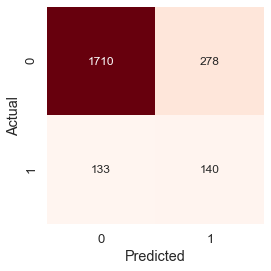

In [92]:
confusion_mat(final_model, X_test, y_test)

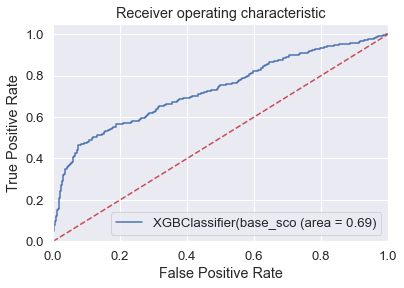

In [93]:
roc_auc = roc_auc_score(y_test, final_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label=f'{str(final_model)[:22]} (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

## Summing up:
This final model lost a little bit of accuracy on test, performing 83% but with much better precision and recall in class 1 predicting 50% that the client will accept the new product and 90% that won't also gave a ROC of 0.69 that for me is good